In [39]:
# Getting libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [40]:
# Define variables
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

In [41]:
# Keras instancy: just 1 neuro to send and recibe
lay = tf.keras.layers.Dense(units=1, input_shape=[1])

In [42]:
# Modelling
model = tf.keras.Sequential([lay])
model.compile(
    optimizer = tf.keras.optimizers.Adam(0.1),
    loss = 'mean_squared_error'
)


In [43]:
# Run the model
print("Begin the training...")
historical = model.fit(celsius, fahrenheit, epochs = 1000, verbose = False)
print("The model has been trained")

Begin the training...
The model has been trained


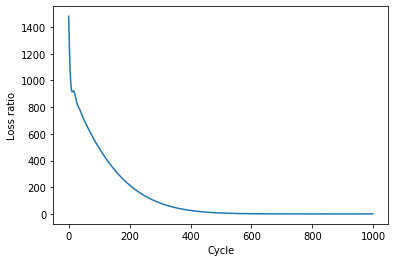

In [44]:
# Iteration precition
plt.xlabel("Cycle")
plt.ylabel("Loss ratio")
plt.plot(historical.history["loss"])


In [45]:
# Test
print("We are going do an estimation of 100 °C")
forecast = model.predict([100.0])
print("The estimation is {} °F".format(forecast))

We are going do an estimation of 100 °C
The estimation is [[211.74396]] °F


In [46]:
# Final parameters
print("Internal model parameters")
print(lay.get_weights())

Internal model parameters
[array([[1.7981424]], dtype=float32), array([31.929714], dtype=float32)]


We are going to add an internal lay into the neuralnet model

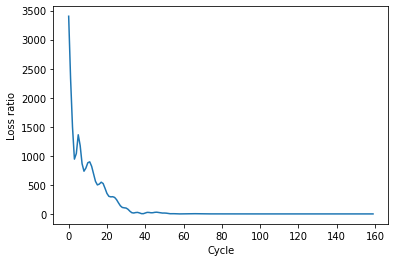

In [51]:
# Keras instancy: We use a double internal layer with 3 neuralnets
int_lay_1 = tf.keras.layers.Dense(units=3, input_shape=[1])
int_lay_2 = tf.keras.layers.Dense(units=3)
out_lay = tf.keras.layers.Dense(units=1)

model_2 = tf.keras.Sequential([int_lay_1, int_lay_2, out_lay])
model_2.compile(
    optimizer = tf.keras.optimizers.Adam(0.1),
    loss = 'mean_squared_error'
)

historical = model_2.fit(celsius, fahrenheit, epochs = 160, verbose = False)
plt.xlabel("Cycle")
plt.ylabel("Loss ratio")
plt.plot(historical.history["loss"])


In [52]:
forecast = model_2.predict([100.0])
forecast

array([[211.70763]], dtype=float32)